### Analyze run

In [1]:
from os import path
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

import matplotlib.pyplot as plt

In [2]:
# the directory where all the runs are saved
BASE_DIR = "/home/datascience/airplane_detector/runs/detect"
RUN_NAME = "train3"
RUN_LOG = "results.csv"

# the name of the file where all metrics are stored, during the training
FILE_NAME = path.join(BASE_DIR, RUN_NAME, RUN_LOG)

In [3]:
results_df = pd.read_csv(FILE_NAME)

results_df.tail()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
195,196,0.75426,0.44420,1.2166,0.99917,1.0,0.995,0.84646,0.74413,0.35022,1.1306,0.000079,0.000079,0.000079
196,197,0.73034,0.42965,1.2166,0.99910,1.0,0.995,0.84487,0.7442,0.3537,1.1272,0.000069,0.000069,0.000069
197,198,0.73909,0.43851,1.2184,0.99899,1.0,0.995,0.84454,0.74333,0.35544,1.126,0.000060,0.000060,0.000060
198,199,0.76160,0.44539,1.1990,0.99894,1.0,0.995,0.85212,0.75047,0.35061,1.1314,0.000050,0.000050,0.000050
199,200,0.71997,0.41852,1.1725,0.99885,1.0,0.995,0.85355,0.75719,0.35171,1.1357,0.000040,0.000040,0.000040


In [4]:
def plot_metric(which, df):
    if which == "Precision":
        col = 4
    if which == "Recall":
        col = 5
    if which == "mAP50-95":
        col = 7

    vet_epochs = df[df.columns[0]].values
    vet_values = df[df.columns[col]].values

    plt.plot(vet_epochs, vet_values)
    plt.grid(True)
    plt.title(which)
    plt.xlabel("Epochs")
    plt.ylabel(which)

### Precision and Recall

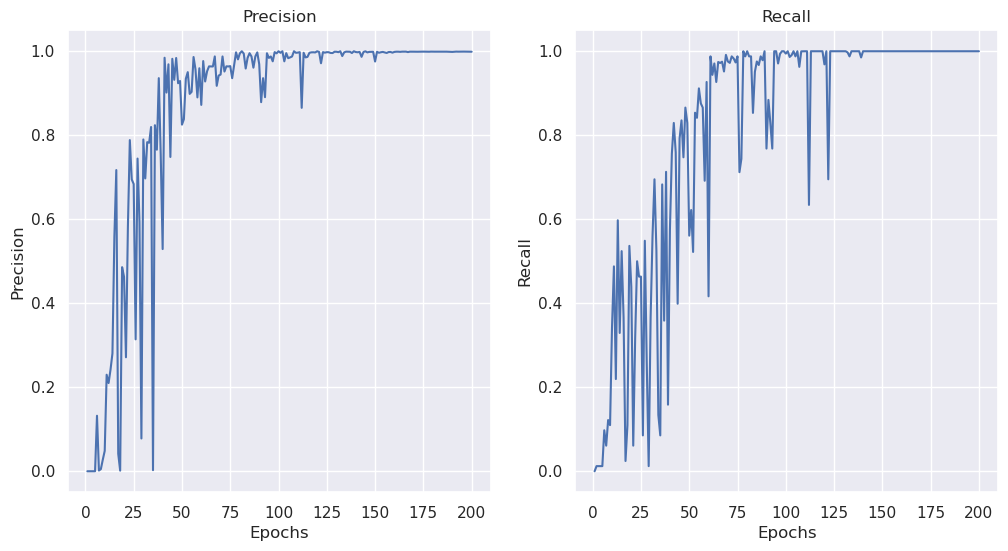

In [5]:
# one grid for two plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plot_metric("Precision", results_df)
plt.subplot(1, 2, 2)
plot_metric("Recall", results_df)

### mAP50-95

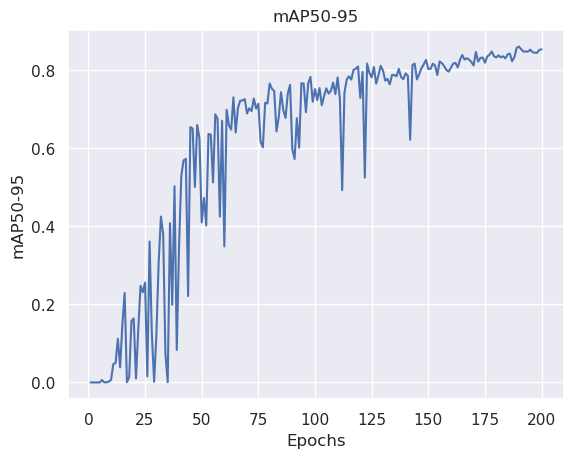

In [6]:
plot_metric("mAP50-95", results_df)